In [9]:
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 as nc
import datetime as dt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201812_2015_S3.nc')

In [10]:
torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00


In [4]:
f.variables.keys()

dict_keys(['ammonium', 'biogenic_silicon', 'bounds_lat', 'bounds_lon', 'ciliates', 'deptht', 'deptht_bounds', 'diatoms', 'dissolved_organic_nitrogen', 'e3t', 'flagellates', 'mesozooplankton', 'microzooplankton', 'nav_lat', 'nav_lon', 'nitrate', 'particulate_organic_nitrogen', 'silicon', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds'])

In [8]:
f.variables['deptht']

<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    name: deptht
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

Text(0, 0.5, 'ciliates (µM N)')

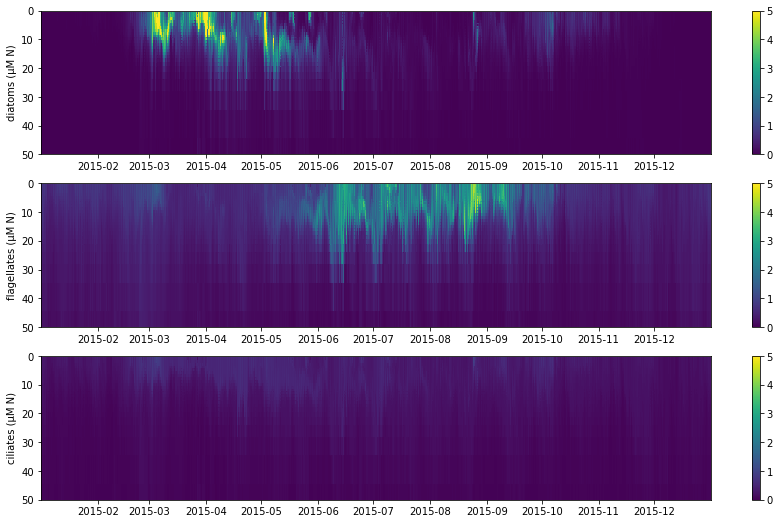

In [19]:
fig,ax=plt.subplots(3,1,figsize=(15,9))
m0=ax[0].pcolormesh(times,f.variables['deptht'][:],f.variables['diatoms'][:,:,0,0].T,vmin=0,vmax=5)
ax[0].set_ylim(50,0)
fig.colorbar(m0,ax=ax[0])
ax[0].set_ylabel('diatoms (µM N)')
m1=ax[1].pcolormesh(times,f.variables['deptht'][:],f.variables['flagellates'][:,:,0,0].T,vmin=0,vmax=5)
ax[1].set_ylim(50,0)
fig.colorbar(m1,ax=ax[1])
ax[1].set_ylabel('flagellates (µM N)')
m2=ax[2].pcolormesh(times,f.variables['deptht'][:],f.variables['ciliates'][:,:,0,0].T,vmin=0,vmax=5)
ax[2].set_ylim(50,0)
fig.colorbar(m2,ax=ax[2])
ax[2].set_ylabel('ciliates (µM N)')

Text(0.5, 0, 'Diatoms [blue]\n Flagellates [red]')

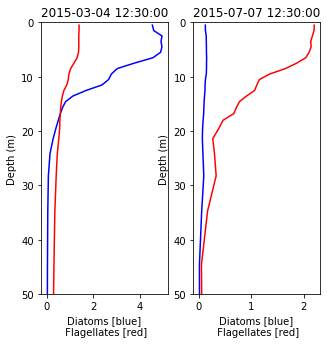

In [34]:
fig,ax=plt.subplots(1,2,figsize=(5,5))
ax[0].plot(f.variables['diatoms'][1500,:50,0,0],f.variables['deptht'][:50],'b-')
ax[0].plot(f.variables['flagellates'][1500,:50,0,0],f.variables['deptht'][:50],'r-')
ax[0].set_ylim(50,0)
ax[0].set_title(times[1500])
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Diatoms [blue]\n Flagellates [red]')
ax[1].plot(f.variables['diatoms'][4500,:50,0,0],f.variables['deptht'][:50],'b-')
ax[1].plot(f.variables['flagellates'][4500,:50,0,0],f.variables['deptht'][:50],'r-')
ax[1].set_ylim(50,0)
ax[1].set_title(times[4500])
ax[1].set_ylabel('Depth (m)')
ax[1].set_xlabel('Diatoms [blue]\n Flagellates [red]')

In [33]:
times[4500]

datetime.datetime(2015, 7, 7, 12, 30)